In [57]:
# Question 1 of coding assigmment

%pip install scikit-learn numpy matplotlib.pyplot
import numpy as np
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [58]:
# I will now load the dataset
iris = datasets.load_iris()
X = iris.data  # These are the 4 features
y = iris.target  # These are the output


In [59]:
# We will now preprocess the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [60]:
# Normalization (Min-Max Scaling)
scaling_norm = MinMaxScaler()
X_train_norm = scaling_norm.fit_transform(X_train)
X_test_norm = scaling_norm.transform(X_test)

# Standardization (Z-score Scaling)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

# For unprocessed I don't need to do anything

In [61]:
def softmax(logits):
    exp_logits = np.exp(logits)
    return exp_logits / np.sum(exp_logits, axis=-1, keepdims=True)

# Created the softmax as per the book

In [62]:
class MulticlassLogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate # Gradient Descent
        self.epochs = epochs # Number of iterations
        self.W = None  # Will store the theta matrix
        self.losses = []

    def fit(self, X, y, method):
        m, n = X.shape    # m is the number of samples and n is number of features
        k = len(np.unique(y))  # Number of classes (0,1,2)

        # We are using one-hot encoding to create an identity matrix to convert labels into one-hot format
        Y_onehot = np.eye(k)[y]   

        # Initializing weights and bias
        self.W = np.random.randn(n, k)  # We are assigning random values for weights

        for epoch in range(self.epochs):
            if method == 'gd': # This is for batch gradient descent
                logits = np.dot(X, self.W)  # Computes the Linear combination of inputs with weights
                probabilities = softmax(logits)  # We are using softmax function to produce class probabilities

                # Cross-entropy loss
                loss = -np.mean(np.sum(Y_onehot * np.log(probabilities), axis=1))  # As per the question pdf

                # Computing gradient 
                dW = np.dot(X.T, (probabilities - Y_onehot)) / m
                
                # Updating weights
                self.W -= self.learning_rate * dW
                self.losses.append(loss)
                
            
            elif method == 'sgd': # Track total loss for this epoc
                total_loss = 0  # This is for Stochastic Gradient Descent
                for i in range(m):  # It will iterate through each sample
                    xi = X[i].reshape(1, -1)  # Taking a Single sample as row vector
                    yi = Y_onehot[i].reshape(1, -1)  # Corresponding one-hot label

                    logits_i = np.dot(xi, self.W)
                    probabilities_i = softmax(logits_i)

                    # Computing gradient for each sample
                    dW = np.dot(xi.T, (probabilities_i - yi))

                    # Updating weights immediately 
                    self.W -= self.learning_rate * dW

                    # Computing individual sample loss for tracking
                    total_loss += -np.sum(yi * np.log(probabilities_i))

                # Average loss over all samples
                loss = total_loss / m  # Hence, this is cross entropy
                self.losses.append(loss)

            # Track progress
            if epoch % 100 == 0:
                print(f'Epoch {epoch}/{self.epochs}, Loss: {loss:.4f}')

    def predict(self, X):
        logits = np.dot(X, self.W)
        probabilities = softmax(logits)
        return np.argmax(probabilities, axis=1)

Epoch 0/1000, Loss: 5.1024
Epoch 100/1000, Loss: 1.5234
Epoch 200/1000, Loss: 0.9061
Epoch 300/1000, Loss: 0.6839
Epoch 400/1000, Loss: 0.5834
Epoch 500/1000, Loss: 0.5235
Epoch 600/1000, Loss: 0.4813
Epoch 700/1000, Loss: 0.4489
Epoch 800/1000, Loss: 0.4225
Epoch 900/1000, Loss: 0.4003
Raw Data Accuracy using Batch Gradient: 0.95
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.86      0.92        21
           2       0.87      1.00      0.93        20

    accuracy                           0.95        60
   macro avg       0.96      0.95      0.95        60
weighted avg       0.96      0.95      0.95        60

[[19  0  0]
 [ 0 18  3]
 [ 0  0 20]]


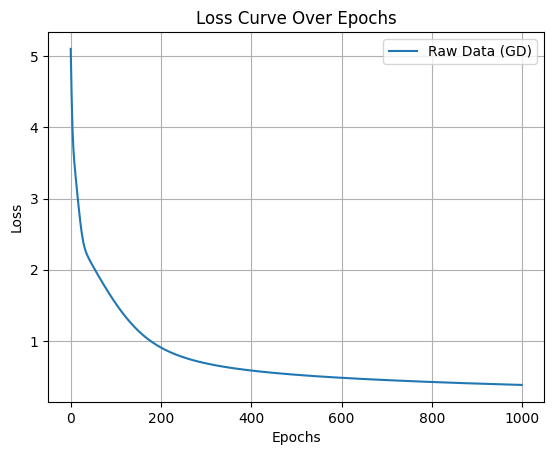

Epoch 0/1000, Loss: 3.1626
Epoch 100/1000, Loss: 0.1512
Epoch 200/1000, Loss: 0.1288
Epoch 300/1000, Loss: 0.1207
Epoch 400/1000, Loss: 0.1166
Epoch 500/1000, Loss: 0.1142
Epoch 600/1000, Loss: 0.1126
Epoch 700/1000, Loss: 0.1116
Epoch 800/1000, Loss: 0.1109
Epoch 900/1000, Loss: 0.1104
Raw Data Accuracy using Stochastic Gradient: 0.9833333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.95      1.00      0.98        21
           2       1.00      0.95      0.97        20

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

[[19  0  0]
 [ 0 21  0]
 [ 0  1 19]]


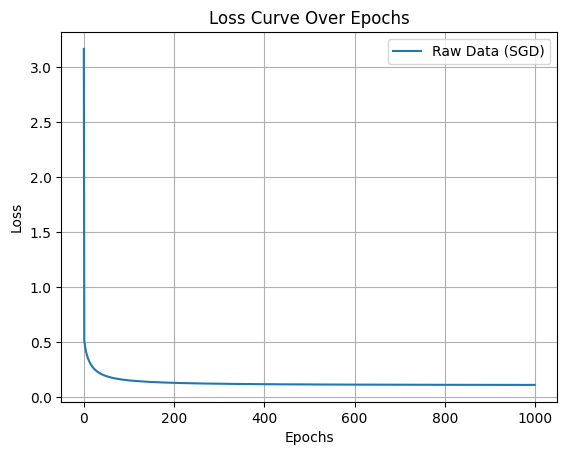

Epoch 0/1000, Loss: 1.0203
Epoch 100/1000, Loss: 0.9926
Epoch 200/1000, Loss: 0.9669
Epoch 300/1000, Loss: 0.9428
Epoch 400/1000, Loss: 0.9202
Epoch 500/1000, Loss: 0.8989
Epoch 600/1000, Loss: 0.8788
Epoch 700/1000, Loss: 0.8598
Epoch 800/1000, Loss: 0.8420
Epoch 900/1000, Loss: 0.8251
Min-Max Scaled Data Accuracy using Batch Gradient: 0.65
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.00      0.00      0.00        21
           2       0.49      1.00      0.66        20

    accuracy                           0.65        60
   macro avg       0.50      0.67      0.55        60
weighted avg       0.48      0.65      0.54        60

[[19  0  0]
 [ 0  0 21]
 [ 0  0 20]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

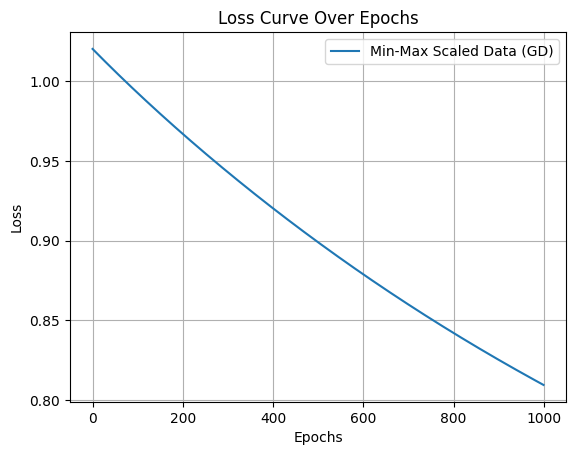

Epoch 0/1000, Loss: 1.6054
Epoch 100/1000, Loss: 0.5059
Epoch 200/1000, Loss: 0.4477
Epoch 300/1000, Loss: 0.4237
Epoch 400/1000, Loss: 0.4104
Epoch 500/1000, Loss: 0.4019
Epoch 600/1000, Loss: 0.3959
Epoch 700/1000, Loss: 0.3913
Epoch 800/1000, Loss: 0.3876
Epoch 900/1000, Loss: 0.3846
Min-Max Scaled Data Accuracy using Batch Gradient: 0.7333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.63      0.57      0.60        21
           2       0.59      0.65      0.62        20

    accuracy                           0.73        60
   macro avg       0.74      0.74      0.74        60
weighted avg       0.73      0.73      0.73        60

[[19  0  0]
 [ 0 12  9]
 [ 0  7 13]]


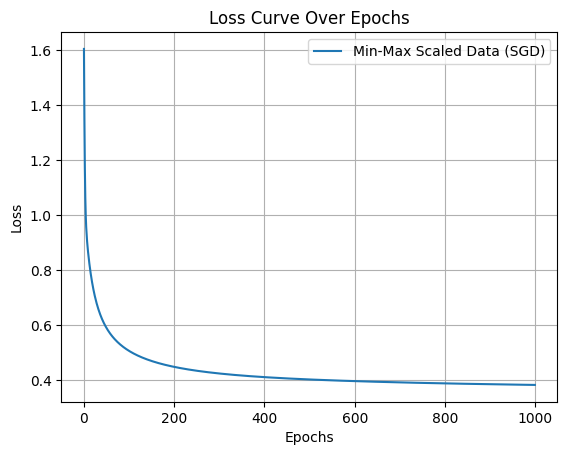

Epoch 0/1000, Loss: 0.8542
Epoch 100/1000, Loss: 0.5070
Epoch 200/1000, Loss: 0.4193
Epoch 300/1000, Loss: 0.3829
Epoch 400/1000, Loss: 0.3626
Epoch 500/1000, Loss: 0.3492
Epoch 600/1000, Loss: 0.3393
Epoch 700/1000, Loss: 0.3316
Epoch 800/1000, Loss: 0.3252
Epoch 900/1000, Loss: 0.3198
Standardized Data Accuracy: 0.7833333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.79      0.52      0.63        21
           2       0.63      0.85      0.72        20

    accuracy                           0.78        60
   macro avg       0.81      0.79      0.78        60
weighted avg       0.80      0.78      0.78        60

[[19  0  0]
 [ 0 11 10]
 [ 0  3 17]]


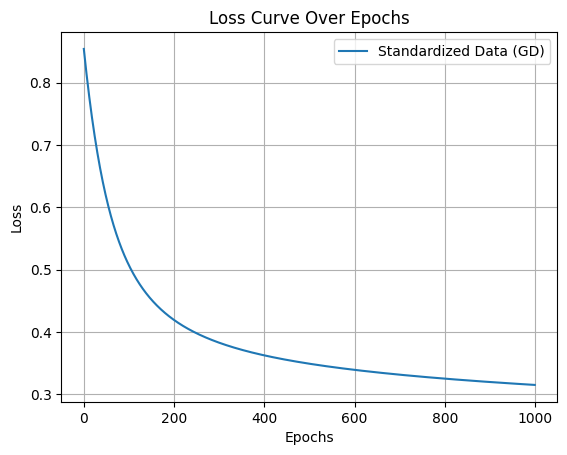

Epoch 0/1000, Loss: 1.1358
Epoch 100/1000, Loss: 0.2580
Epoch 200/1000, Loss: 0.2502
Epoch 300/1000, Loss: 0.2470
Epoch 400/1000, Loss: 0.2451
Epoch 500/1000, Loss: 0.2438
Epoch 600/1000, Loss: 0.2429
Epoch 700/1000, Loss: 0.2423
Epoch 800/1000, Loss: 0.2418
Epoch 900/1000, Loss: 0.2414
Standardized Data Accuracy: 0.7833333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.79      0.52      0.63        21
           2       0.63      0.85      0.72        20

    accuracy                           0.78        60
   macro avg       0.81      0.79      0.78        60
weighted avg       0.80      0.78      0.78        60

[[19  0  0]
 [ 0 11 10]
 [ 0  3 17]]


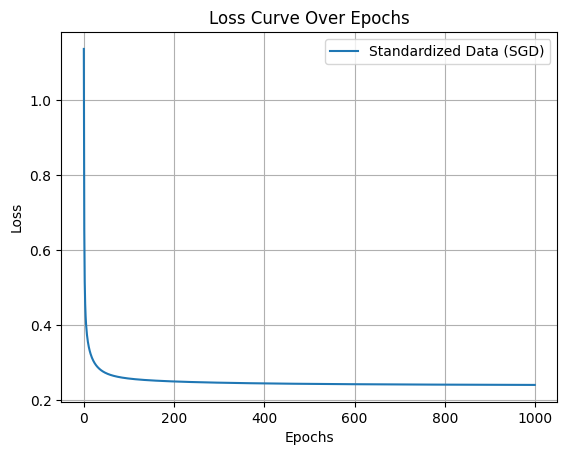

In [63]:
# Training and Evaluating for Raw Data
model_raw = MulticlassLogisticRegression()
model_raw.fit(X_train, y_train, method='gd')
print("Raw Data Accuracy using Batch Gradient:", accuracy_score(y_test, model_raw.predict(X_test)))
print(classification_report(y_test, model_raw.predict(X_test)))
print(confusion_matrix(y_test, model_raw.predict(X_test)))

# Visualizing the loss curve
plt.plot(model_raw.losses, label='Raw Data (GD)')
plt.title('Loss Curve Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

model_raw = MulticlassLogisticRegression()
model_raw.fit(X_train, y_train, method='sgd')
print("Raw Data Accuracy using Stochastic Gradient:", accuracy_score(y_test, model_raw.predict(X_test)))
print(classification_report(y_test, model_raw.predict(X_test)))
print(confusion_matrix(y_test, model_raw.predict(X_test)))

# Visualizing the loss curve
plt.plot(model_raw.losses, label='Raw Data (SGD)')
plt.title('Loss Curve Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Training and Evaluating for Min-Max Scaled Data
model_minmax = MulticlassLogisticRegression()
model_minmax.fit(X_train_norm, y_train, method='gd')
print("Min-Max Scaled Data Accuracy using Batch Gradient:", accuracy_score(y_test, model_minmax.predict(X_test_norm)))
print(classification_report(y_test, model_minmax.predict(X_test_norm)))
print(confusion_matrix(y_test, model_minmax.predict(X_test_norm)))

# Visualizing the loss curve
plt.plot(model_minmax.losses, label='Min-Max Scaled Data (GD)')
plt.title('Loss Curve Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

model_minmax = MulticlassLogisticRegression()
model_minmax.fit(X_train_norm, y_train, method='sgd')
print("Min-Max Scaled Data Accuracy using Batch Gradient:", accuracy_score(y_test, model_minmax.predict(X_test_norm)))
print(classification_report(y_test, model_minmax.predict(X_test_norm)))
print(confusion_matrix(y_test, model_minmax.predict(X_test_norm)))

# Visualizing the loss curve
plt.plot(model_minmax.losses, label='Min-Max Scaled Data (SGD)')
plt.title('Loss Curve Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Train and Evaluate for Standardized Data
model_std = MulticlassLogisticRegression(learning_rate=0.01, epochs=1000)
model_std.fit(X_train_std, y_train, method='gd')
print("Standardized Data Accuracy:", accuracy_score(y_test, model_std.predict(X_test_std)))
print(classification_report(y_test, model_std.predict(X_test_std)))
print(confusion_matrix(y_test, model_std.predict(X_test_std)))

# Visualizing the loss curve
plt.plot(model_std.losses, label='Standardized Data (GD)')
plt.title('Loss Curve Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Train and Evaluate for Standardized Data
model_std = MulticlassLogisticRegression(learning_rate=0.01, epochs=1000)
model_std.fit(X_train_std, y_train, method='sgd')
print("Standardized Data Accuracy:", accuracy_score(y_test, model_std.predict(X_test_std)))
print(classification_report(y_test, model_std.predict(X_test_std)))
print(confusion_matrix(y_test, model_std.predict(X_test_std)))

# Visualizing the loss curve
plt.plot(model_std.losses, label='Standardized Data (SGD)')
plt.title('Loss Curve Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [64]:
# Question 2 of the coding assignment

%pip install xlrd
# Loading the dataset
url = "/Users/yuvarajmandal/Desktop/concrete+compressive+strength/Concrete_Data.xls"  
data = pd.read_excel(url)



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [65]:
# Displaying first few rows to understand structure
from IPython.display import display
display(data.head())

# The compressive strength is at the last column. Rest of the columns are independent variables.

# Checking for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

X = data.iloc[:, :-1] 
y = data.iloc[:, -1]

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


Missing values in each column:
 Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64


Linear Regression MSE: 124.88351322372023
Linear Regression R^2: 0.5209616457703187


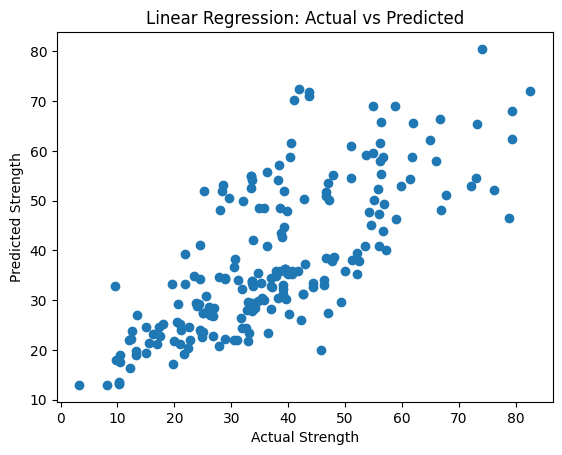

In [66]:
# (b) Implementing Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicting on test set
y_pred_linear = linear_model.predict(X_test)

# Computing MSE and R^2 
mse_linear = np.mean((y_test - y_pred_linear) ** 2)
r2_linear = 1 - (np.sum((y_test - y_pred_linear) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

# Printing these out
print(f"Linear Regression MSE: {mse_linear}")
print(f"Linear Regression R^2: {r2_linear}")

# Plot predicted vs actual values
plt.scatter(y_test, y_pred_linear)
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

Polynomial Regression (Degree 2) MSE: 67.27670343426102
Polynomial Regression (Degree 2) R^2: 0.7419345399627548


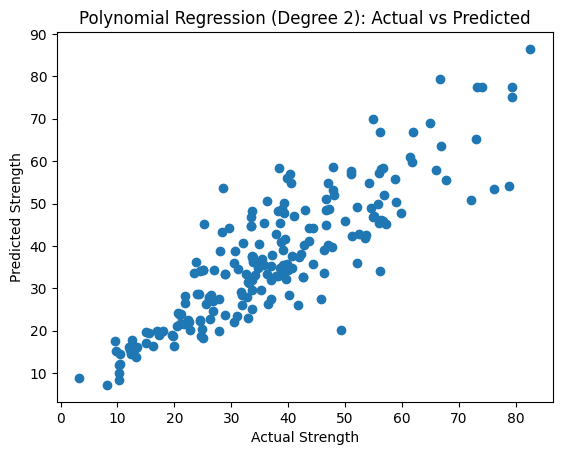

Polynomial Regression (Degree 3) MSE: 59.095060261350675
Polynomial Regression (Degree 3) R^2: 0.7733183534003564


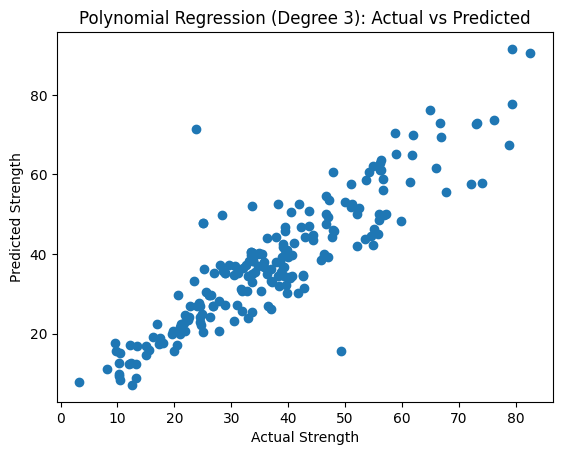

Polynomial Regression (Degree 4) MSE: 2243.5461713125437
Polynomial Regression (Degree 4) R^2: -7.605977184662738


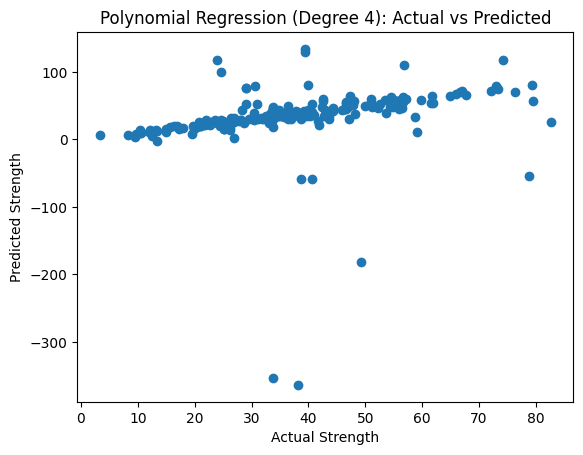

In [67]:
# (c) Implementing Polynomial Regression for degrees 2, 3, 4

degrees = [2, 3, 4]
mse_values, r2_values = [mse_linear], [r2_linear]
for k in degrees:
    poly = PolynomialFeatures(degree=k)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    
    y_pred_poly = poly_model.predict(X_test_poly)
    
    # Compute MSE and R^2 manually
    mse_poly = np.mean((y_test - y_pred_poly) ** 2)
    r2_poly = 1 - (np.sum((y_test - y_pred_poly) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))
    mse_values.append(mse_poly)
    r2_values.append(r2_poly)
    
    print(f"Polynomial Regression (Degree {k}) MSE: {mse_poly}")
    print(f"Polynomial Regression (Degree {k}) R^2: {r2_poly}")
    
    # Plot predicted vs actual values
    plt.scatter(y_test, y_pred_poly)
    plt.xlabel("Actual Strength")
    plt.ylabel("Predicted Strength")
    plt.title(f"Polynomial Regression (Degree {k}): Actual vs Predicted")
    plt.show()

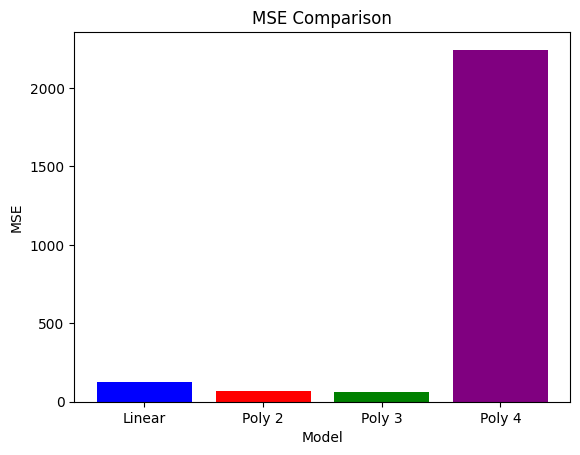

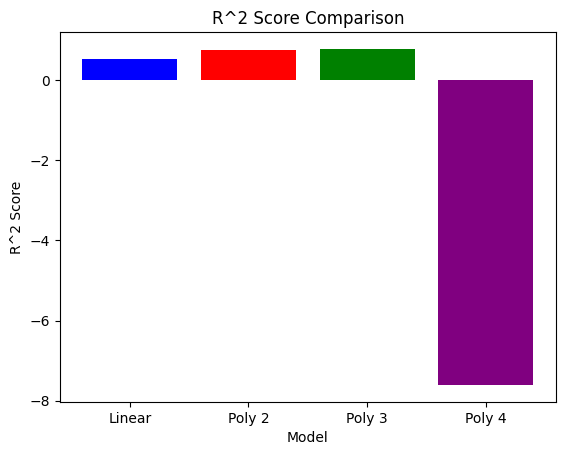

In [68]:
# (d)

# MSE and R^2 Comparison
models = ["Linear"] + [f"Poly {k}" for k in degrees]
plt.bar(models, mse_values, color=['blue', 'red', 'green', 'purple'])
plt.xlabel("Model")
plt.ylabel("MSE")
plt.title("MSE Comparison")
plt.show()

plt.bar(models, r2_values, color=['blue', 'red', 'green', 'purple'])
plt.xlabel("Model")
plt.ylabel("R^2 Score")
plt.title("R^2 Score Comparison")
plt.show()


In [69]:
# Bias-Variance Tradeoff Question
# Linear regression has high bias and low variance, meaning it may underfit the data but generalizes well.
# Higher-degree polynomial regression reduces bias but increases variance, leading to overfitting.
# The optimal model balances bias and variance, so it can be a moderate polynomial degree.

# Why do higher-degree polynomials overfit? They capture noise in the data rather than the true pattern.
# So, They create overly complex models that fit the training data very well but fail on new data. This results in high variance and poor generalization.


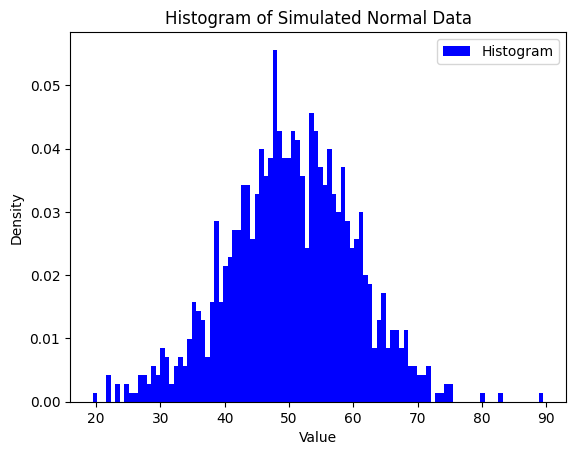

In [70]:
# Question 3 of coding assignment

import scipy.stats as stats

# (a) 
np.random.seed(1)  # I added this for reproducibility
mu, sigma = 50, 10  # Mean and standard deviation
sample_size = 1000

data = np.random.normal(mu, sigma, sample_size)

# Plot histogram
plt.hist(data, bins=100, density=True, color='blue', label='Histogram')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Simulated Normal Data')
plt.legend()
plt.show()


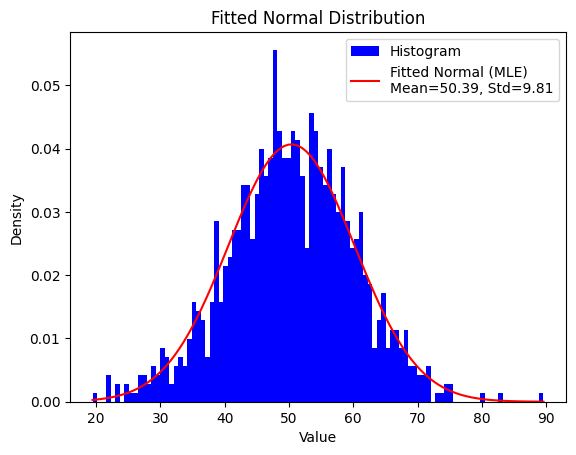

In [71]:
# (b) Normal Distribution Fitting
mu_hat = sum(data) / len(data)
sigma_hat = np.sqrt(sum((data - mu_hat) ** 2) / len(data))

# Overlaying PDF
x = np.linspace(min(data), max(data), 100)
pdf = stats.norm.pdf(x, mu_hat, sigma_hat)
plt.hist(data, bins=100, density=True, color='blue', label='Histogram')
plt.plot(x, pdf, 'r-', label=f'Fitted Normal (MLE)\nMean={mu_hat:.2f}, Std={sigma_hat:.2f}')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Fitted Normal Distribution')
plt.legend()
plt.show()

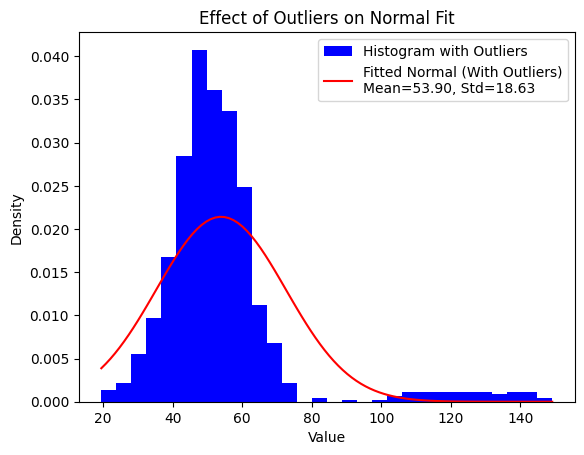

In [72]:
# (c) Handling Outliers
outliers = np.random.uniform(100, 150, 50)  # Generate 50 outliers
new_data = np.concatenate((data, outliers))

# Manual MLE estimation for new dataset
mu_hat_new = sum(new_data) / len(new_data)
sigma_hat_new = np.sqrt(sum((new_data - mu_hat_new) ** 2) / len(new_data))

# Overlaying PDF on new histogram
x_new = np.linspace(min(new_data), max(new_data), 100)
pdf_new = stats.norm.pdf(x_new, mu_hat_new, sigma_hat_new)
plt.hist(new_data, bins=30, density=True, color='blue', label='Histogram with Outliers')
plt.plot(x_new, pdf_new, 'r-', label=f'Fitted Normal (With Outliers)\nMean={mu_hat_new:.2f}, Std={sigma_hat_new:.2f}')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Effect of Outliers on Normal Fit')
plt.legend()
plt.show()

In [73]:

# Outliers clearly have a significant impact on the estimated parameters of the normal distribution.
# The presence of outliers increases the estimated mean and standard deviation as seen above, which leads to a distorted normal fit that does not accurately represent the main dataset.
# A possible approach to detect outliers is by computing z-scores and removing extreme values.